In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np

from student_client import create_student_gym_env

env = create_student_gym_env(user_token='your_token')
env.reset()

2026-02-18 20:08:46,149 - student_client.student_gym_env - INFO - Client is up to date (version 0.2)
2026-02-18 20:08:46,151 - student_client.student_gym_env - INFO - Created new session: b00f82b3-bdb8-4354-bbec-4a5aa72ce50f
2026-02-18 20:08:47,065 - student_client.student_gym_env - INFO - Created new episode: 8d423c09-ecbc-46b8-91a9-2c7e45505efa
2026-02-18 20:08:47,065 - student_client.student_gym_env - INFO - StudentGymEnv initialized with episode 8d423c09-ecbc-46b8-91a9-2c7e45505efa
2026-02-18 20:08:47,981 - student_client.student_gym_env - INFO - Episode 8d423c09-ecbc-46b8-91a9-2c7e45505efa reset successfully


(array([7.9566083e+02, 1.9372777e+04, 3.3566522e+02, 1.1200746e+03,
        3.7205705e-01, 1.3636194e+06, 3.9569614e+03, 0.0000000e+00,
        9.8051033e+00], dtype=float32),
 {'step': 0,
  'episode_id': '8d423c09-ecbc-46b8-91a9-2c7e45505efa',
  'terminated': False,
  'truncated': False})

In [14]:
# Reset environment to get initial observation
obs, info = env.reset()
print(f"📋 Starting episode {info.get('episode_id', 'unknown')}")

obs.shape, info

2026-02-18 20:10:15,117 - student_client.student_gym_env - INFO - Episode 8d423c09-ecbc-46b8-91a9-2c7e45505efa reset successfully


📋 Starting episode 8d423c09-ecbc-46b8-91a9-2c7e45505efa


((9,),
 {'step': 0,
  'episode_id': '8d423c09-ecbc-46b8-91a9-2c7e45505efa',
  'terminated': False,
  'truncated': False})

In [15]:
# Initialize data collection arrays
observations = []
actions = []
rewards = []
total_timesteps = 0

for step in range(50):

    # Choose a random action (0=do nothing, 1=repair, 2=sell)
    action = env.action_space.sample()
    print(action)

    # Take step in environment
    obs_result, reward, terminated, truncated, info = env.step(
        action=action,
    )

    print(f'obs_result: {obs_result.shape}')

    observations.append(obs_result)
    actions.append(action)

    rewards.append(reward)

    # Update total timesteps - server advances by step_size but returns only final observation
    total_timesteps = info['step']

    # Print progress every step
    if step % 1 == 0:
        print(f" Step {total_timesteps}: Reward={reward:.2f}, Total={sum(rewards):.2f}")

    # Check if episode ended
    if terminated or truncated:
        print(f"🏁 Episode ended at step {total_timesteps} with reward={reward:.2f}")
        break


# Print summary statistics
total_reward = sum(rewards)
print(f"\n Episode Summary:")
print(f"   Total Steps: {len(actions)}")
print(f"   Total Reward: {total_reward:.2f}")
print(f"   Actions Taken: {len([a for a in actions if a == 1])} repairs, {len([a for a in actions if a == 2])} sell")

0
obs_result: (10, 9)
 Step 9: Reward=425.77, Total=425.77
1
obs_result: (10, 9)
 Step 19: Reward=-503.25, Total=-77.48
2
Episode 8d423c09-ecbc-46b8-91a9-2c7e45505efa reached termination state, reason: sold
obs_result: (1, 9)
 Step 21: Reward=139.63, Total=62.15
🏁 Episode ended at step 21 with reward=139.63

 Episode Summary:
   Total Steps: 3
   Total Reward: 62.15
   Actions Taken: 1 repairs, 1 sell


In [18]:
# Finish episode
env.close()

2026-02-18 20:10:30,781 - student_client.student_gym_env - INFO - Closed environment 8d423c09-ecbc-46b8-91a9-2c7e45505efa


In [17]:
len(observations), len(actions)

(3, 3)

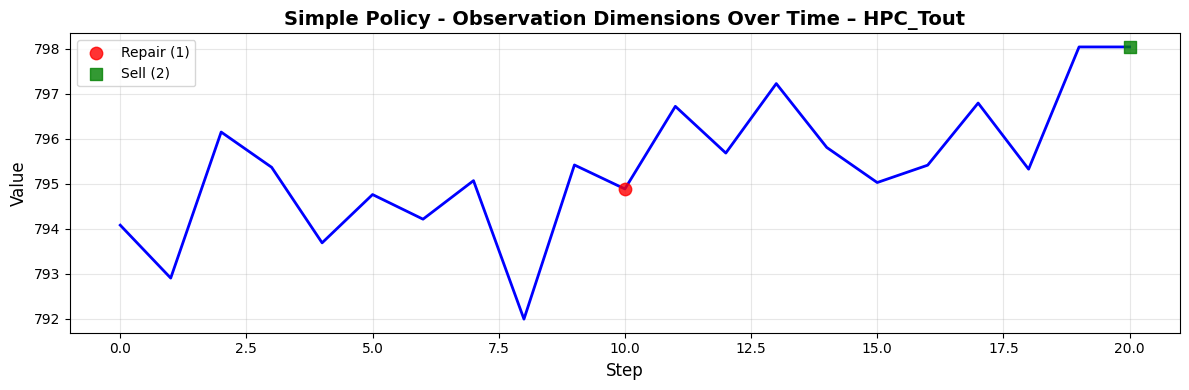

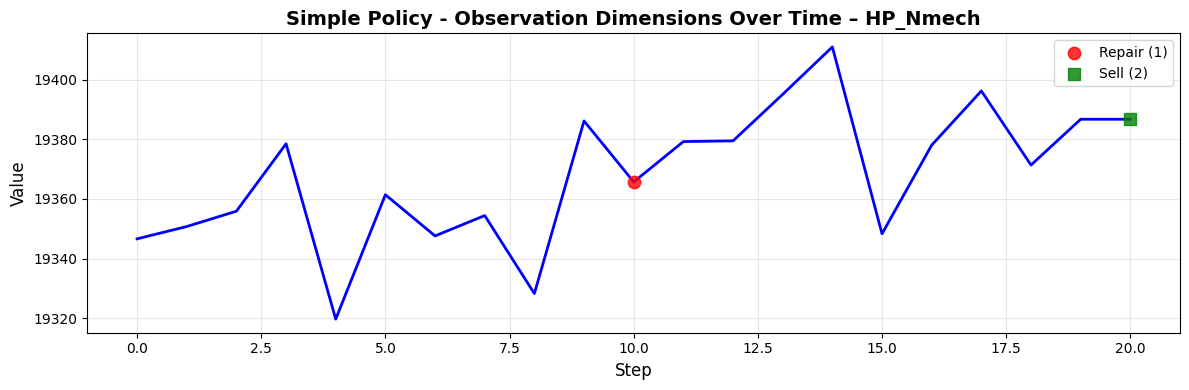

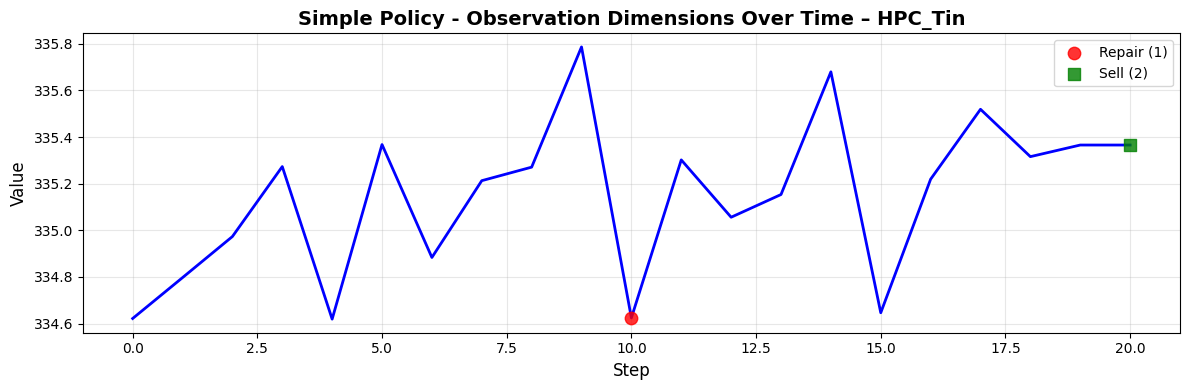

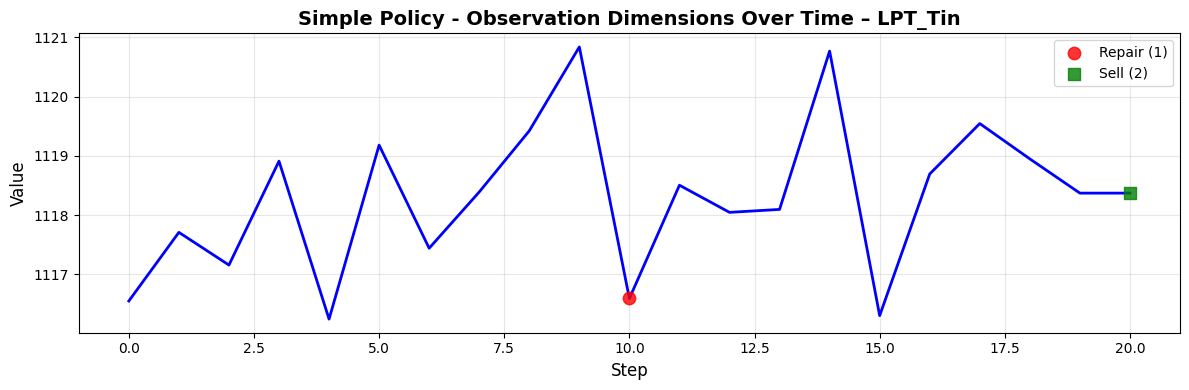

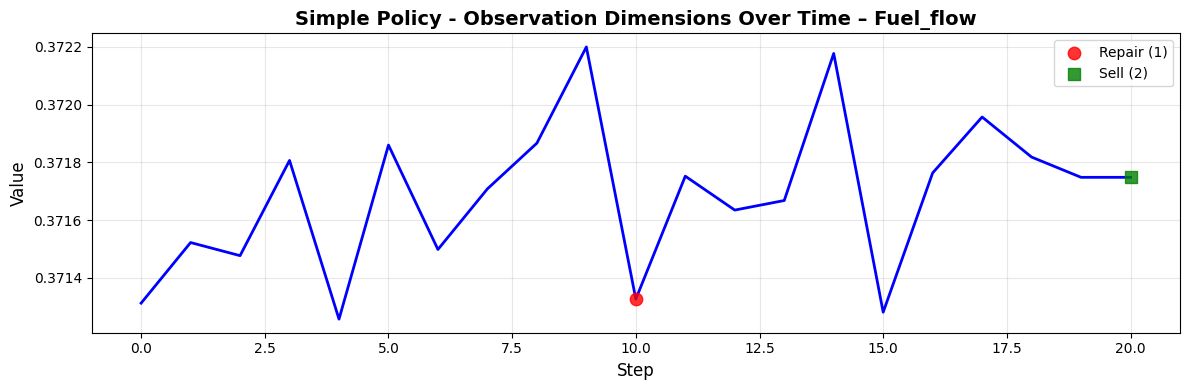

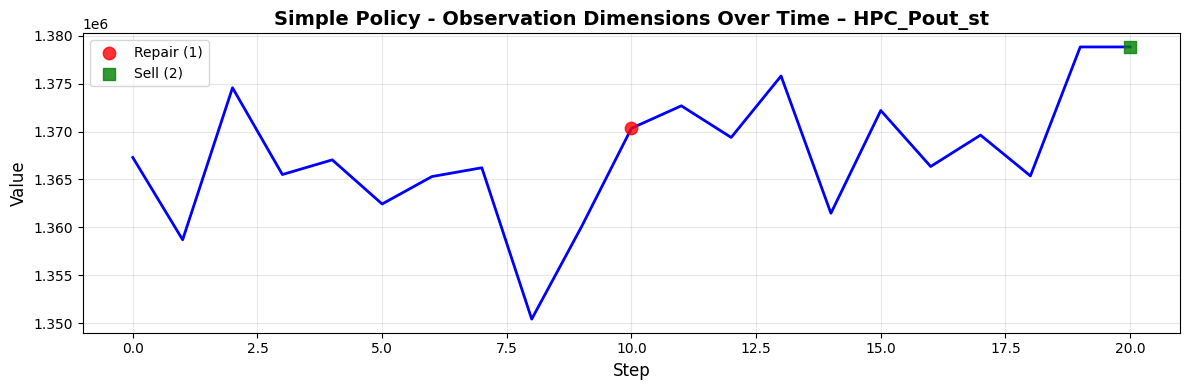

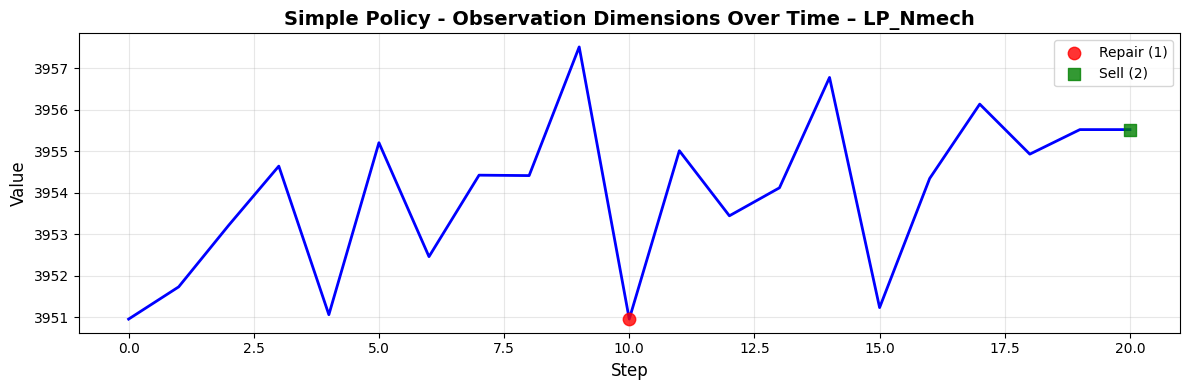

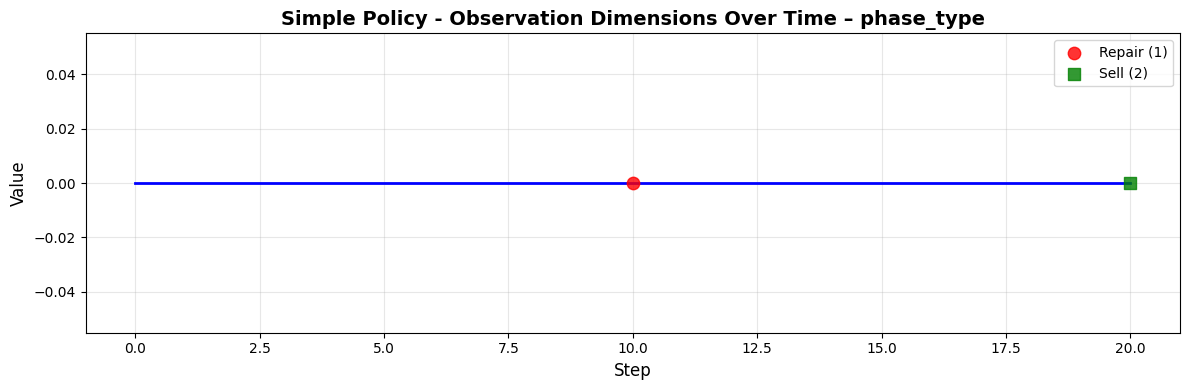

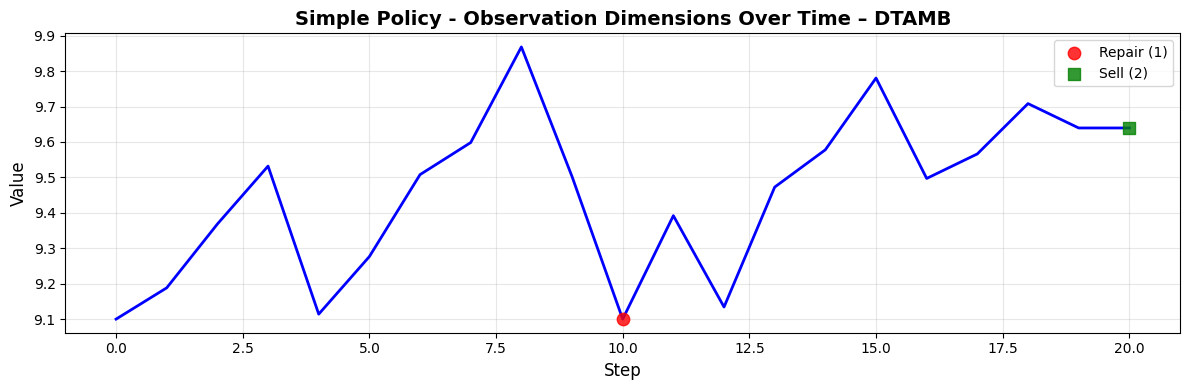

In [16]:
from student_client.plotting import plot_observations


plot_observations(
        observations=observations,
        actions=actions,
        title="Simple Policy - Observation Dimensions Over Time"
    )

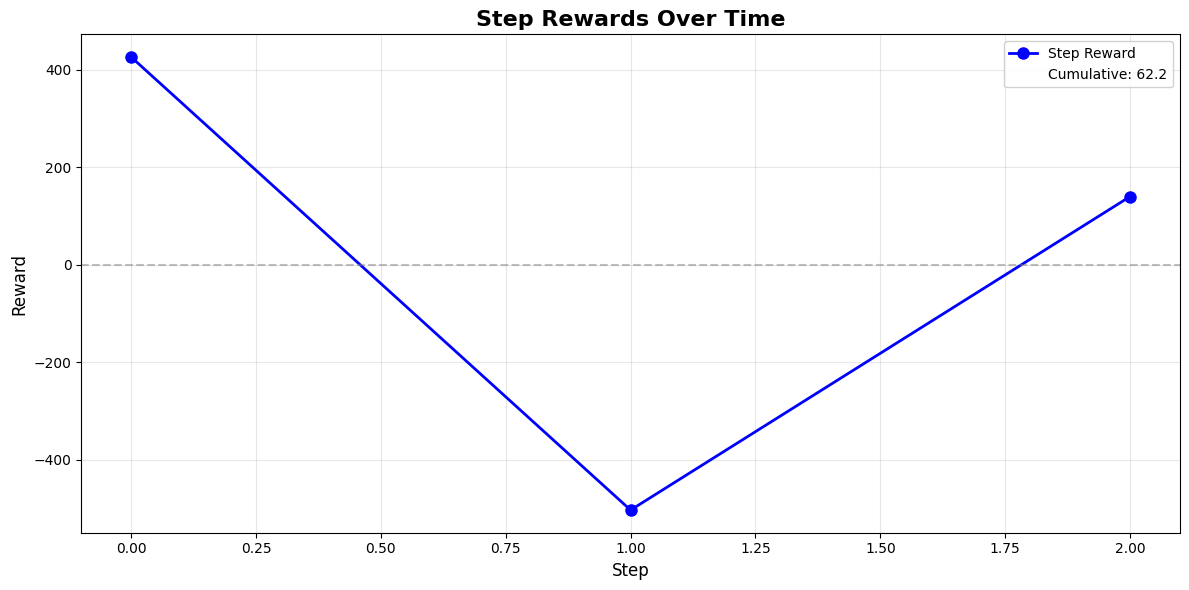

📊 Reward Statistics:
   Total Steps: 3
   Total Reward: 62.15
   Average Reward: 20.72
   Max Reward: 425.77
   Min Reward: -503.25


In [19]:
from student_client.plotting import plot_rewards

plot_rewards(rewards=rewards)